In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
              

In [ ]:
# import dataset
data=pd.read_csv('/content/50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
data.shape

(50, 5)

In [ ]:
#Rename columns
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MARKS'},axis=1)

In [ ]:
data1

,RDS,ADMS,MARKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data1.duplicated()

In [ ]:
data1.describe()

,RDS,ADMS,MARKS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
#Correlation Analysis: by correlation matrix

In [ ]:
data1.corr()

,RDS,ADMS,MARKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MARKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


scatter plot between variables along with histogram

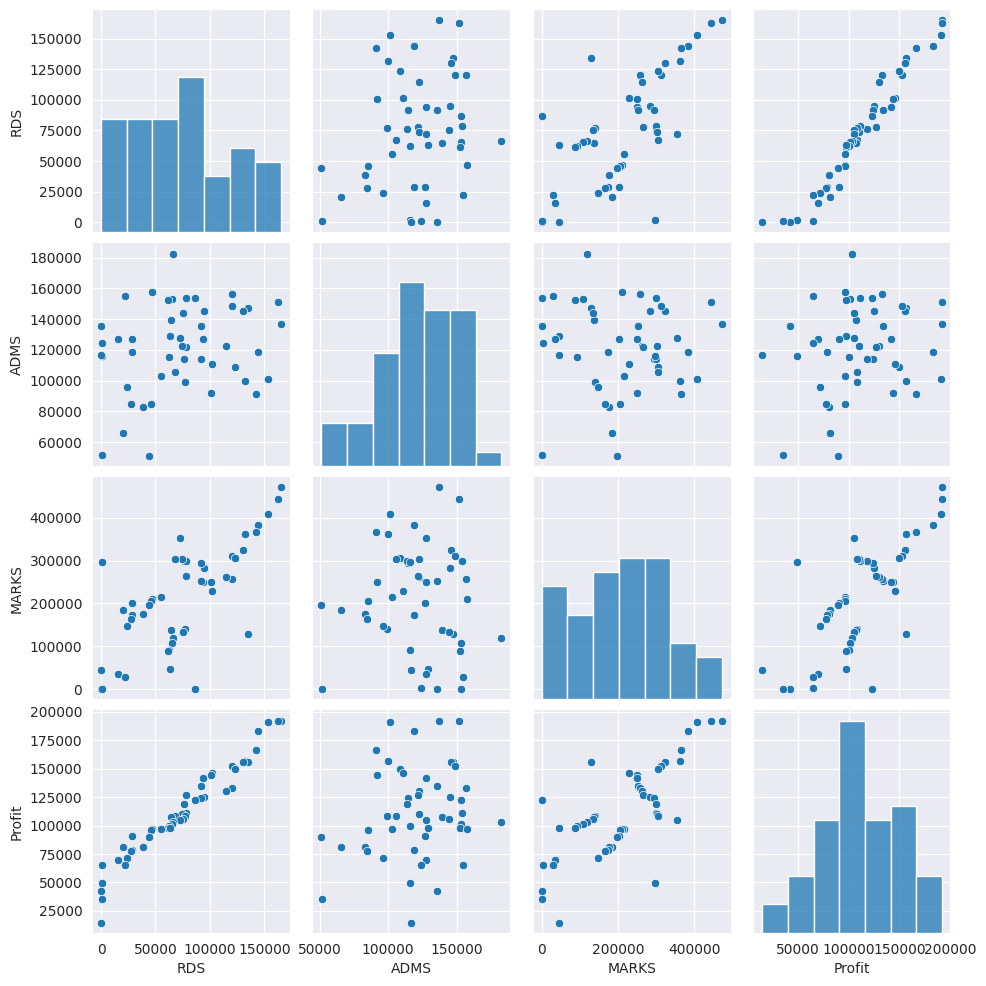

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

Preapare Model

In [ ]:
#Built model
model=smf.ols('Profit~RDS+ADMS+MARKS',data=data1).fit()

In [ ]:
#MOdel Testing
#Finding coefficient Beta values
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MARKS            0.027228
dtype: float64

In [ ]:
#Finding tvalues & pvalues
print('t values','\n',model.tvalues,'\n''p values',model.pvalues)

t values 
 Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MARKS         1.655077
dtype: float64 
p values Intercept    1.057379e-09
RDS          2.634968e-22
ADMS         6.017551e-01
MARKS        1.047168e-01
dtype: float64


In [ ]:
# R squared values
(model.rsquared,model.rsquared_adj)  #Rsquare=0.95 is very good regression  & model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

Built simple linear regression & multilinear regression Models for variables

In [ ]:
m1_a=smf.ols('Profit~ADMS',data=data1).fit() #simple regression model profit Vs ADMs
m1_a.tvalues,m1_a.pvalues


(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [ ]:
m1_m=smf.ols('Profit~MARKS',data=data1).fit() #simple regression model profit Vs MARKS
m1_m.tvalues,m1_m.pvalues


(Intercept    7.808356
 MARKS        7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MARKS        4.381073e-10
 dtype: float64)

In [ ]:
m1_r=smf.ols('Profit~RDS',data=data1).fit() #simple regression model profit Vs ADMs
m1_r.tvalues,m1_r.pvalues


(Intercept    19.320288
 RDS          29.151139
 dtype: float64,
 Intercept    2.782697e-24
 RDS          3.500322e-32
 dtype: float64)

In [ ]:
m1_am=smf.ols('Profit~ADMS+MARKS',data=data1).fit() #simple regression model profit Vs ADMs
m1_am.tvalues,m1_am.pvalues


(Intercept    1.142741
 ADMS         2.467779
 MARKS        8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MARKS        9.727245e-11
 dtype: float64)

Model Validation By
1. Collinearity Check by VIF
2.Residual Analysis


In [ ]:
#ckeck collinarity problem
#Calculating VIF(variance inflation factor) vif=1/(1-Rsquare) for all independent variables

rsq_r=smf.ols('RDS~ADMS+MARKS',data=data1).fit().rsquared # build regression model considering RDS as y variable
vif_r=1/(1-rsq_r)


rsq_a=smf.ols('ADMS~RDS+MARKS',data=data1).fit().rsquared # build regression model considering RDS as y variable
vif_a=1/(1-rsq_a)


rsq_m=smf.ols('MARKS~ADMS+RDS',data=data1).fit().rsquared # build regression model considering RDS as y variable
vif_m=1/(1-rsq_m)


#storing vif values in dataframe
d1 = {'Variables':['RDS','ADMS','MARKS'],'VIF':[vif_r,vif_a,vif_m,]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame





,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MARKS,2.326773


In [ ]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

2.Residual Analysis:- Test for Normality of Residuals (Q-Q plot)

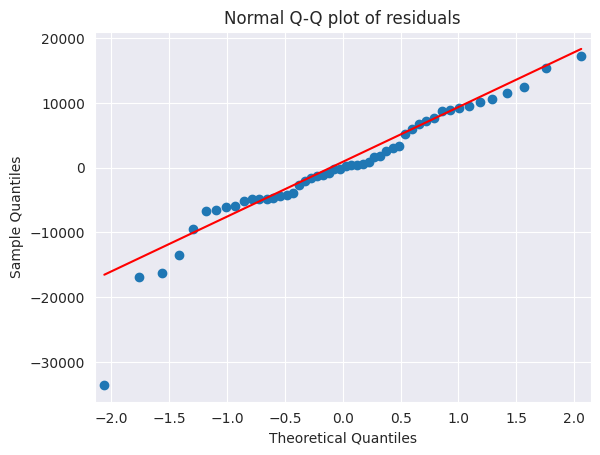

In [ ]:
model=smf.ols('Profit~RDS+ADMS+MARKS',data=data1).fit()

qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")    # points that are away from line are outliers
plt.show()

In [ ]:
# to print index of values whose y value isless than -20000
list(np.where(model.resid<-20000))

[array([49])]

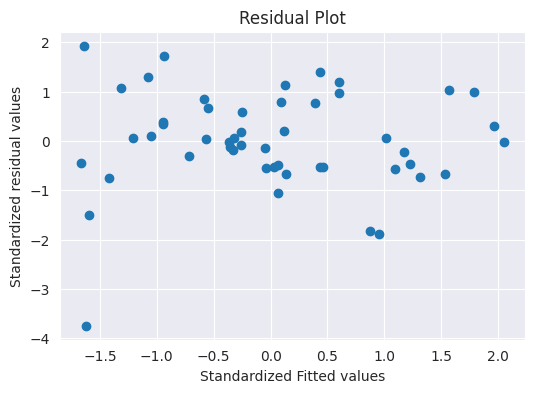

In [ ]:
## Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
# Function definition for standardization i.e. z score, Function name: get_standardized_values

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()


plt.figure(figsize=(6,4))
plt.scatter(get_standardized_values(model.fittedvalues), # fittedvalue is y hat.,model.resid is error
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressor

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 

eval_env: 1


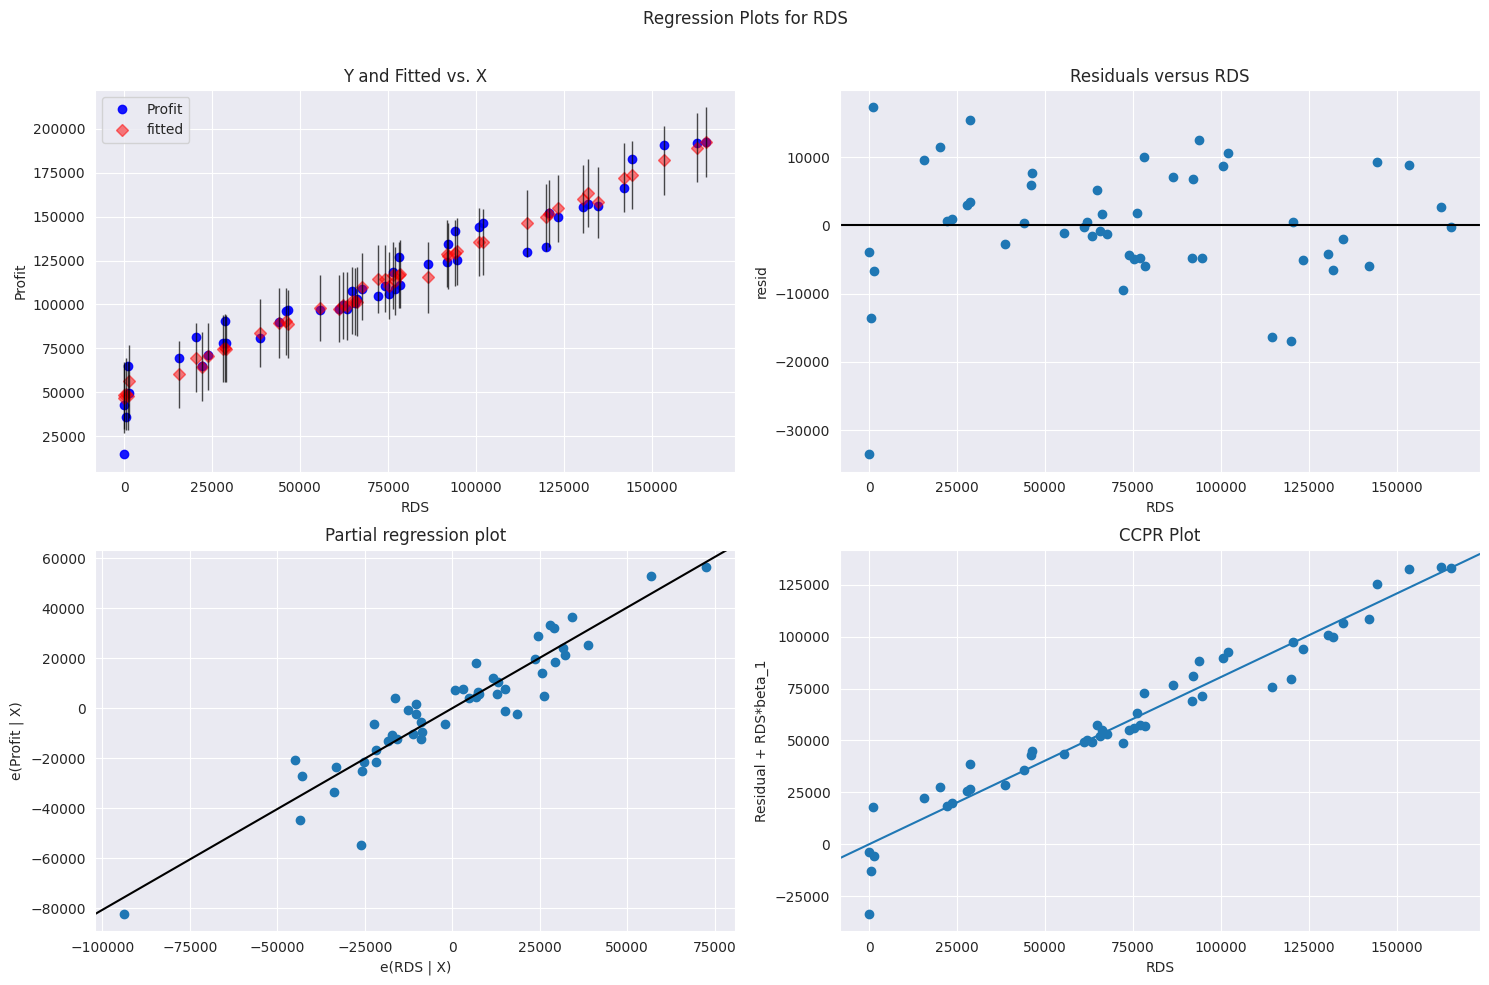

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


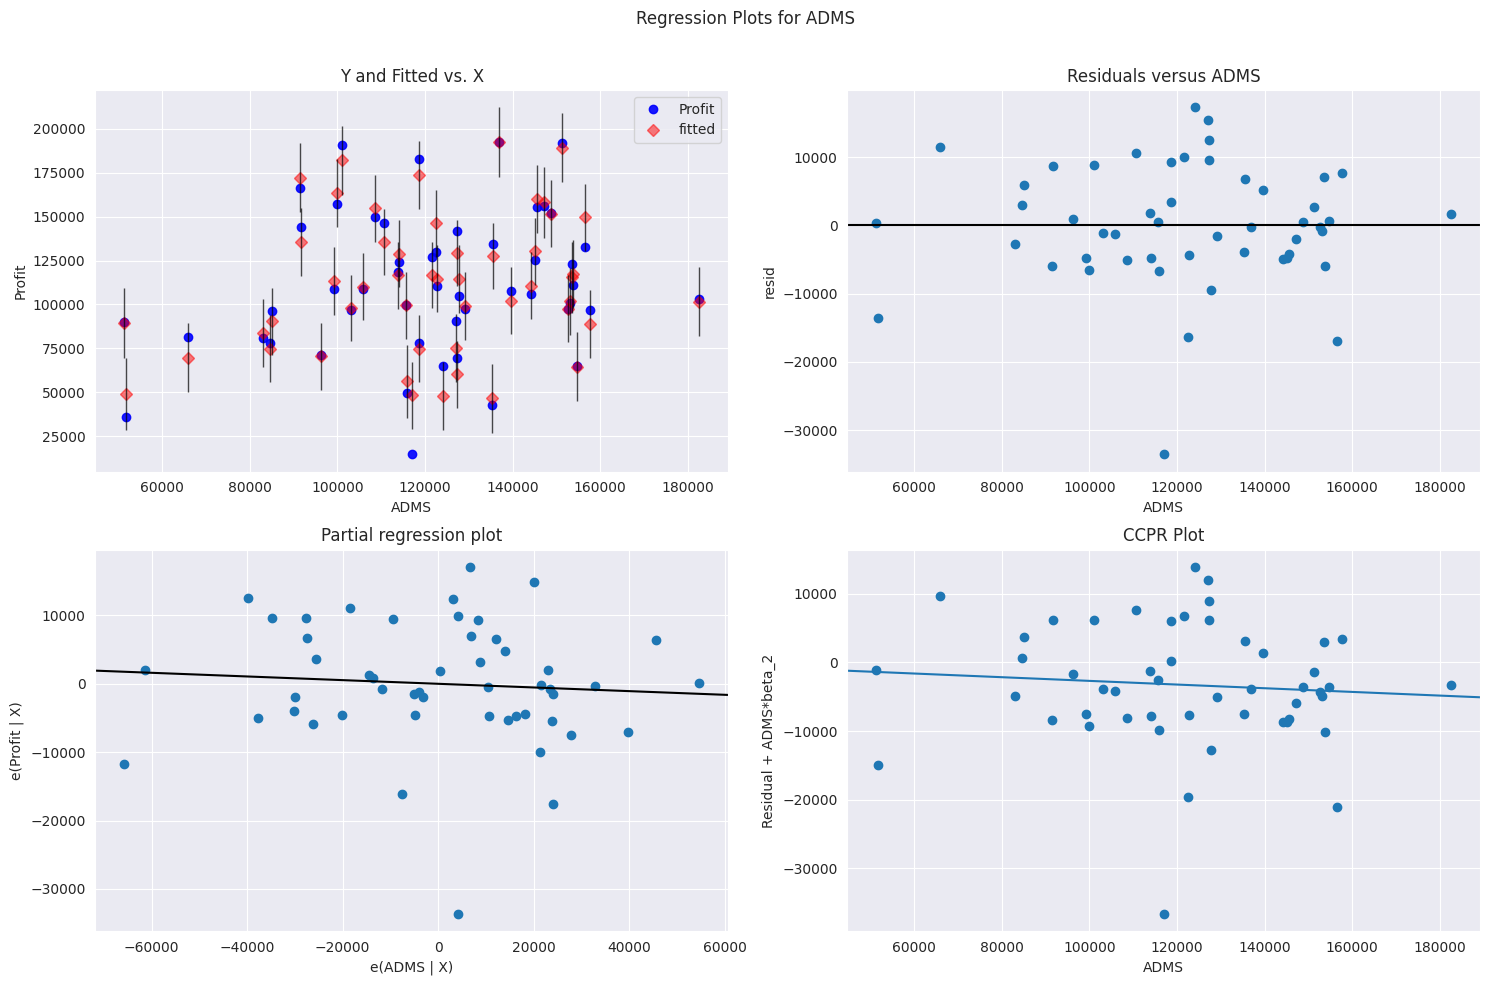

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


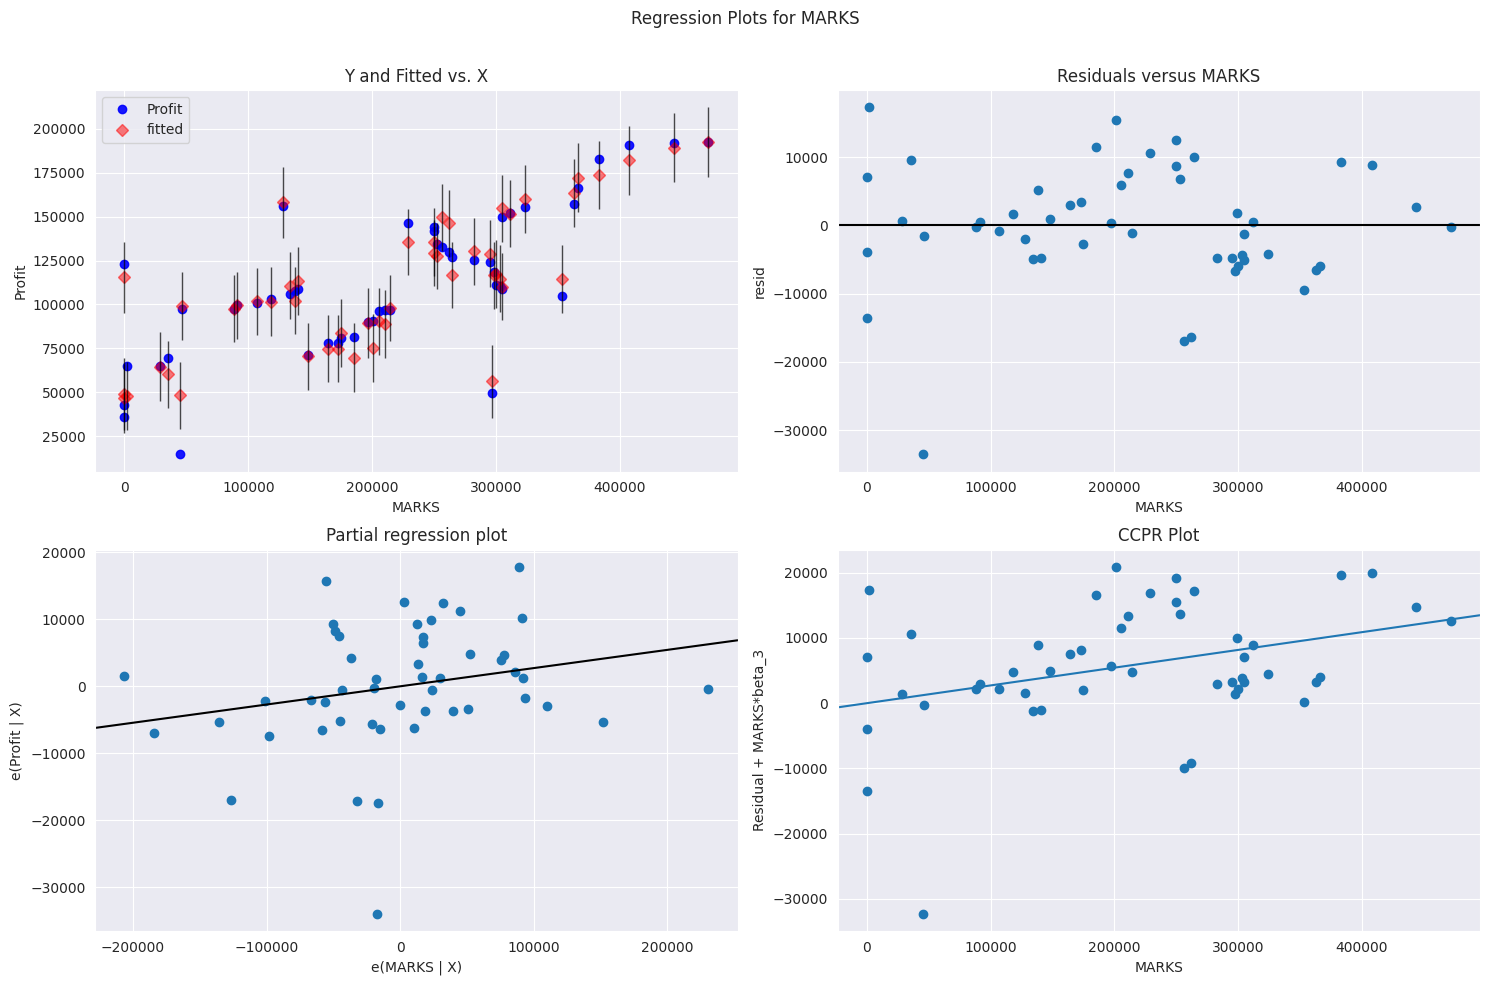

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'MARKS',fig=fig)
plt.show()

Model Deletion Diagnostics
(Detecting outliers/influencer)

In [ ]:
#Two Techniques  1. Cooks Distance 2.leverage value
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance


In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence() # this method will return 2 values: cook's distance and p-value.
(c, _) = model_influence.cooks_distance # we don't need p-value so we placed _ here. That is temporary place holder

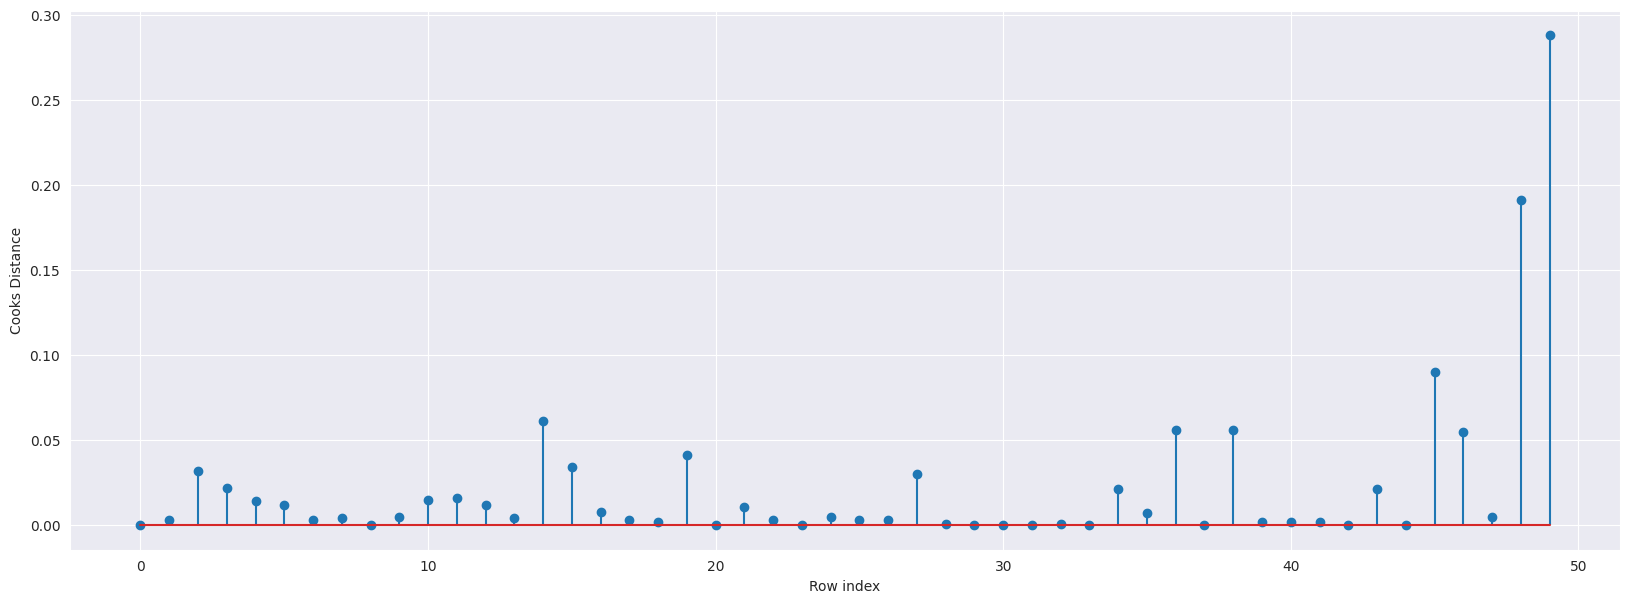

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3)) # index values of data1 on x-axis
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than 0.5

np.argmax(c),np.max(c)

(49, 0.2880822927543272)

High influence points

In [ ]:
data1.shape

(50, 5)

In [ ]:
k = data.shape[1] #k is no of variables
n = data.shape[0] # no of data points
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

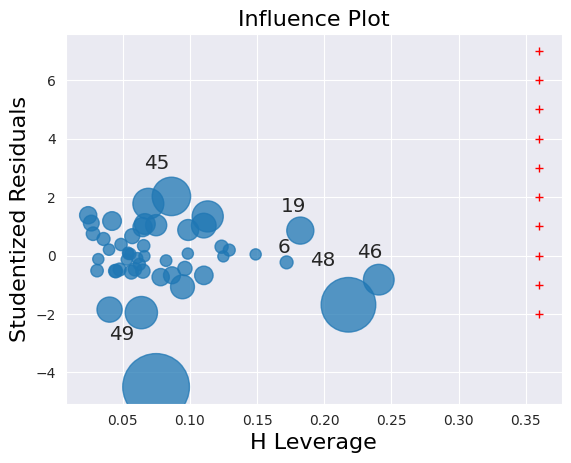

In [ ]:
#Liverage value  using High influence points:
#Points beyond Leverage_cutoff value are influencers

from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]# -2 to 8: 10 values for printing + in red color
x=[leverage_cutoff for i in range(10)] # 10 values for printing + in red color
plt.plot(x,y,'r+')

plt.show()

From above plot ,it is evident that data point 49 is the influencer

In [ ]:
data1[data1.index.isin([49])]

,RDS,ADMS,MARKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


Improving the Model

In [ ]:
#Discard the data points which are influencersand reasign the row 
data2=data1.drop(data1.index[[49]],axis=0).reset_index()
data2

,index,RDS,ADMS,MARKS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data3=data2.drop(['index'],axis=1)
data3

,RDS,ADMS,MARKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#Built model on new data
model1= smf.ols('Profit~RDS+ADMS+MARKS',data = data3).fit()

In [ ]:
(model1.rsquared,model1.aic) # compare Rsquare with 1st model values. It was0.95074 now it is 0.9613

(0.9613162435129847, 1020.5652974526367)

Model Predictions

In [ ]:
#New data for prediction 
new_data=pd.DataFrame({'RDS':50000,'ADMS':10000,'MARKS':15000},index=[0])
new_data

,RDS,ADMS,MARKS
0,50000,10000,15000


In [ ]:
model1.predict(new_data)

0    91689.023511
dtype: float64

Table  containing R^2 value for each prepared model

In [ ]:
A2={'Prep_Models':['Model','Model1'],'Rsquared':[model.rsquared,model1.rsquared]}
table=pd.DataFrame(A2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Model1,0.961316
